In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import to_categorical 

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten 

In [45]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
x_test.shape

(10000, 28, 28)

In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

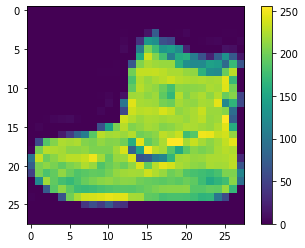

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

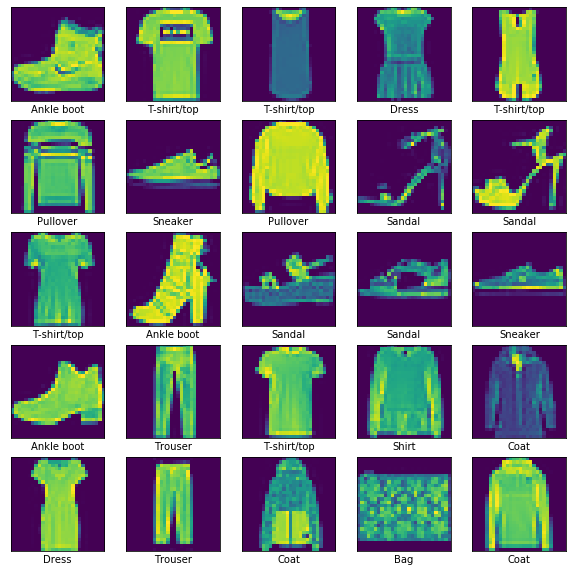

In [47]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.savefig('Fashion-MNIST First 25 Sample.png')    
plt.show()


### Reshaping training set and test set

In [32]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') #noted that since images are sized 28x28 and they are in grayscale. 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Normalizing 

In [33]:
x_train = x_train / 255
x_test = x_test / 255

### Transform target column to one-hot like output 

In [34]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
num_classes = y_test.shape[1] # number of categories

### Build the model

In [36]:
def convolutional_model():
    model = Sequential()
    input_shape = (28, 28, 1)
    
    model.add(Conv2D(16, kernel_size = (2,2), strides = (1,1), activation = 'relu', input_shape = input_shape))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))
    
    model.add(Conv2D(32, kernel_size = (2,2), strides = (1,1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))
    
    model.add(Conv2D(32, kernel_size = (2,2), strides = (1,1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))

    model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model 
              
              
              


In [41]:
from keras.callbacks import Callback
from time import time
class TimingCallback(Callback):
    def __init__(self):
        self.logs=[]
    def on_epoch_begin(epoch, logs={}):
        self.starttime=time()
    def on_epoch_end(epoch, logs={}):
        self.logs.append(time()-self.starttime)


In [43]:
model = convolutional_model()
cb = TimingCallback()

model.fit(x_train, y_train, validation_data = ( x_test, y_test), epochs = 10, batch_size = 200, verbose = 1
          ,callbacks=[cb] )

Epoch 1/10


TypeError: on_epoch_begin() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
print(cb.logs)

In [30]:
scores = model.evaluate(x_test, y_test, verbose = 0)

In [50]:
scores

[0.26052633201777936, 0.9174]

In [32]:
print("Loss: {} \n Accuracy%: {} \n Error: {}".format(scores[0],scores[1], 100 - scores[1]* 100))

Loss: 0.2649287194222212 
 Accuracy%: 0.9125 
 Error: 8.75


In [ ]:
# model.save("Fashion-MNIST_classification_model_3eLayer.h5")

In [46]:
w1 = model.layers[0].get_weights()[0]
w2 = model.layers[2].get_weights()[0]
w3 = model.layers[4].get_weights()[0]

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 32)        4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)            

In [78]:
weights_value

[0.73809403,
 0.75144833,
 0.7709528,
 0.8579972,
 0.9071775,
 0.9346143,
 0.9752368,
 1.0345503,
 1.1193957,
 1.2190223,
 1.3378803,
 1.435839]

L1 more conv layer 1
 [('filt_9', 0.5364565), ('filt_12', 0.5874183), ('filt_1', 0.6760793), ('filt_13', 0.69604164), ('filt_3', 0.73809403), ('filt_11', 0.75144833), ('filt_7', 0.7709528), ('filt_8', 0.8579972), ('filt_4', 0.9071775), ('filt_5', 0.9346143), ('filt_2', 0.9752368), ('filt_15', 1.0345503), ('filt_10', 1.1193957), ('filt_6', 1.2190223), ('filt_0', 1.3378803), ('filt_14', 1.435839)]


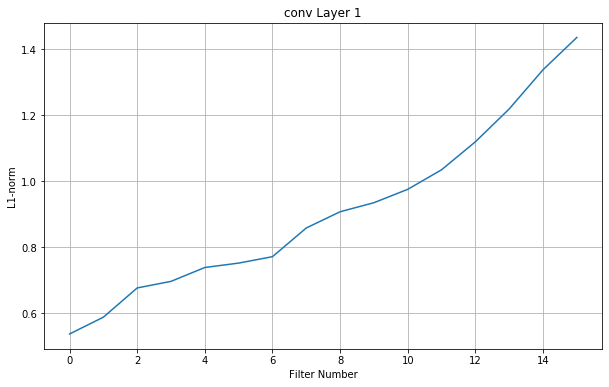

L1 more conv layer 2
 [('filt_0', 5.713554), ('filt_16', 5.866627), ('filt_30', 6.192377), ('filt_23', 6.5852804), ('filt_20', 6.7689905), ('filt_31', 6.778879), ('filt_15', 6.883029), ('filt_29', 6.9839573), ('filt_21', 7.2018375), ('filt_28', 7.259144), ('filt_24', 7.3633733), ('filt_1', 7.3639016), ('filt_5', 7.428768), ('filt_22', 7.4344616), ('filt_2', 7.654087), ('filt_6', 7.714178), ('filt_18', 7.8145714), ('filt_8', 7.8480425), ('filt_7', 7.9418564), ('filt_11', 7.9433265), ('filt_25', 7.944233), ('filt_19', 8.149061), ('filt_3', 8.379457), ('filt_10', 8.441942), ('filt_26', 8.450506), ('filt_14', 8.806815), ('filt_13', 8.885986), ('filt_27', 8.919167), ('filt_17', 9.143944), ('filt_4', 9.378191), ('filt_9', 9.574696), ('filt_12', 10.251366)]


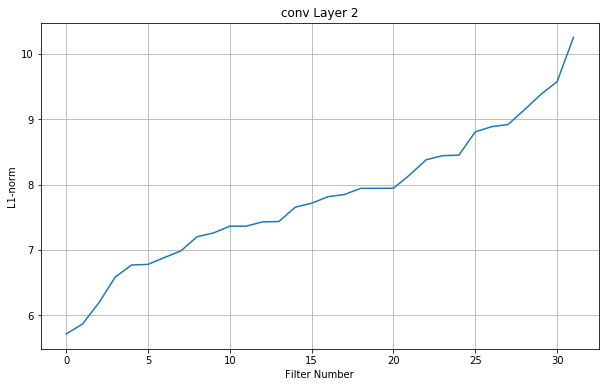

L1 more conv layer 3
 [('filt_22', 11.009697), ('filt_28', 11.5515375), ('filt_21', 11.588878), ('filt_12', 12.121685), ('filt_1', 12.188551), ('filt_0', 12.440982), ('filt_27', 12.504473), ('filt_19', 12.70278), ('filt_7', 12.72989), ('filt_26', 12.733992), ('filt_3', 12.780612), ('filt_2', 12.997604), ('filt_8', 13.024029), ('filt_11', 13.027661), ('filt_14', 13.074688), ('filt_4', 13.204828), ('filt_23', 13.264367), ('filt_25', 13.381868), ('filt_18', 13.537981), ('filt_29', 13.590523), ('filt_20', 13.674128), ('filt_15', 13.703146), ('filt_17', 13.718312), ('filt_13', 13.783937), ('filt_30', 13.8757515), ('filt_9', 13.911467), ('filt_16', 14.037314), ('filt_6', 14.089248), ('filt_24', 14.66993), ('filt_5', 14.687549), ('filt_10', 14.689802), ('filt_31', 15.309482)]


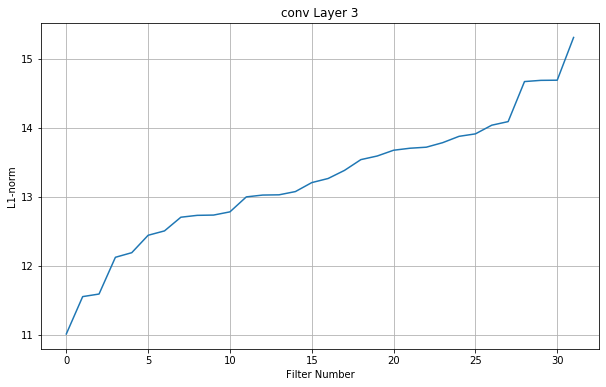

In [63]:
conv_layer_weights = [w1,w2,w3] #define number of layers 

for i in range(len(conv_layer_weights)):
    weight = conv_layer_weights[i]
    weight_dict = {}
    num_filter = len(weight[0,0,0,:])
    
    for j in range(num_filter):
        w_s = np.sum(abs(weight[:,:,:,j])) #calculate value of each filter
        filt = 'filt_{}'.format(j)
        weight_dict[filt] = w_s
    
    weight_dict_sort = sorted(weight_dict.items(), key =lambda kv: kv[1]) #sort the filter as per their ascending value
    print('L1 more conv layer {}\n'.format(i+1),weight_dict_sort)
    
    weights_value = []
    for e in weight_dict_sort:
        weights_value.append(e[1]) #e[1] is the value of L1-norm of each layer
        
    xc = range(num_filter)

    plt.figure(i+1, figsize = (10,6))
    plt.plot(xc, weights_value)
    plt.xlabel('Filter Number')
    plt.ylabel('L1-norm')
    plt.title('conv Layer {}'.format(i+1))
    plt.grid(True)

    plt.show()

### Since the first layer has the lowest L1-norm, we are going to reduce number of filters to improve our model 

let's remove filters [9,12,1,13]

In [64]:
layer_1 = model.layers[0] 

new_model = delete_channels(model, layer_1, [9,12,1,13])
new_model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

Deleting 4/16 channels from layer: conv2d_4


In [65]:
new_scores = new_model.evaluate(x_test, y_test, verbose = 0)
print("Loss: {} \n Accuracy: {} \n Error: {}".format(new_scores[0], new_scores[1], 100-new_scores[1] * 100))

Loss: 0.6605108759880066 
 Accuracy: 0.8128 
 Error: 18.72


After reducing the number of filters in layer 1, the accuracy rate dropped to 81% from 91.25%. That means reducing number of filters in this situlation doesn't improve the model performance.  

Now, let's do pruning again and see what we will see.

In [70]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 12)        60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        1568      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 32)        4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0   

L1 more conv layer 1
 [('filt_2', 0.73809403), ('filt_9', 0.75144833), ('filt_6', 0.7709528), ('filt_7', 0.8579972), ('filt_3', 0.9071775), ('filt_4', 0.9346143), ('filt_1', 0.9752368), ('filt_11', 1.0345503), ('filt_8', 1.1193957), ('filt_5', 1.2190223), ('filt_0', 1.3378803), ('filt_10', 1.435839)]


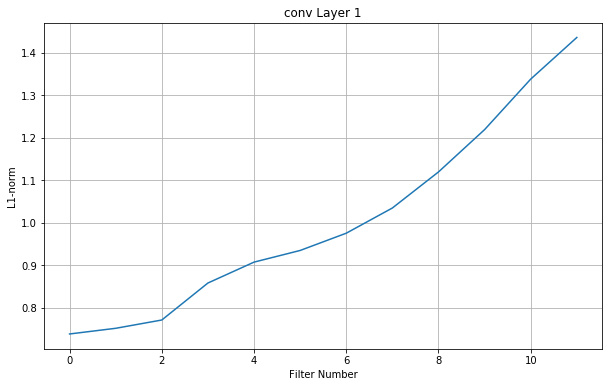

L1 more conv layer 2
 [('filt_0', 4.015334), ('filt_16', 4.546845), ('filt_30', 4.7591724), ('filt_23', 4.763084), ('filt_8', 4.9546165), ('filt_11', 5.1286144), ('filt_20', 5.1415935), ('filt_22', 5.211955), ('filt_28', 5.2499137), ('filt_31', 5.293783), ('filt_15', 5.298212), ('filt_17', 5.38046), ('filt_21', 5.46377), ('filt_29', 5.4742336), ('filt_2', 5.5622473), ('filt_24', 5.5975575), ('filt_1', 5.6673717), ('filt_19', 5.754803), ('filt_5', 5.8508067), ('filt_10', 5.897377), ('filt_7', 5.975606), ('filt_25', 6.0872946), ('filt_9', 6.2351027), ('filt_18', 6.3337975), ('filt_13', 6.376789), ('filt_6', 6.387929), ('filt_14', 6.6167135), ('filt_26', 6.7026043), ('filt_3', 7.058413), ('filt_4', 7.078358), ('filt_27', 7.1163898), ('filt_12', 7.7852917)]


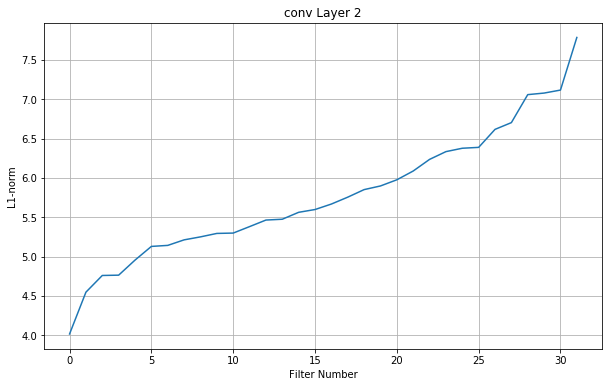

L1 more conv layer 3
 [('filt_22', 11.009697), ('filt_28', 11.5515375), ('filt_21', 11.588878), ('filt_12', 12.121685), ('filt_1', 12.188551), ('filt_0', 12.440982), ('filt_27', 12.504473), ('filt_19', 12.70278), ('filt_7', 12.72989), ('filt_26', 12.733992), ('filt_3', 12.780612), ('filt_2', 12.997604), ('filt_8', 13.024029), ('filt_11', 13.027661), ('filt_14', 13.074688), ('filt_4', 13.204828), ('filt_23', 13.264367), ('filt_25', 13.381868), ('filt_18', 13.537981), ('filt_29', 13.590523), ('filt_20', 13.674128), ('filt_15', 13.703146), ('filt_17', 13.718312), ('filt_13', 13.783937), ('filt_30', 13.8757515), ('filt_9', 13.911467), ('filt_16', 14.037314), ('filt_6', 14.089248), ('filt_24', 14.66993), ('filt_5', 14.687549), ('filt_10', 14.689802), ('filt_31', 15.309482)]


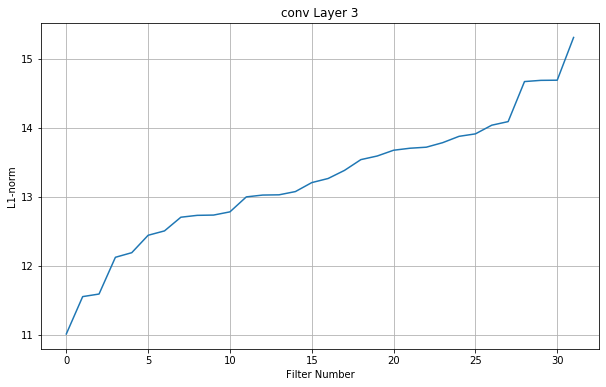

In [79]:
w1 = new_model.layers[1].get_weights()[0]
w2 = new_model.layers[3].get_weights()[0]
w3 = new_model.layers[5].get_weights()[0]

conv_layer_weights = [w1,w2,w3] #define number of layers 

for i in range(len(conv_layer_weights)):
    weight = conv_layer_weights[i]
    weight_dict = {}
    num_filter = len(weight[0,0,0,:])
    
    for j in range(num_filter):
        w_s = np.sum(abs(weight[:,:,:,j])) #calculate value of each filter
        filt = 'filt_{}'.format(j)
        weight_dict[filt] = w_s
    
    weight_dict_sort = sorted(weight_dict.items(), key =lambda kv: kv[1]) #sort the filter as per their ascending value
    print('L1 more conv layer {}\n'.format(i+1),weight_dict_sort)
    
    weights_value = []
    for e in weight_dict_sort:
        weights_value.append(e[1]) #e[1] is the value of L1-norm of each layer
        
    xc = range(num_filter)

    plt.figure(i+1, figsize = (10,6))
    plt.plot(xc, weights_value)
    plt.xlabel('Filter Number')
    plt.ylabel('L1-norm')
    plt.title('conv Layer {}'.format(i+1))
    plt.grid(True)

    plt.show()

As we can see, after reducing the number of filters in the first layer, the values of L1-norm in the second layer has reduced. Which might be the reason causing reduce in performance for the new model 

### Model 2

In [54]:
def convolutional_model():
    model = Sequential()
    input_shape = (28, 28, 1)
    
    model.add(Conv2D(16, kernel_size = (5,5), strides = (1,1), activation = 'relu', input_shape = input_shape))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))

    model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model 
              

In [55]:
model_2 = convolutional_model()
model_2.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 1, epochs = 15, batch_size = 200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 31s 517us/step - loss: 0.4673 - acc: 0.8364 - val_loss: 0.3618 - val_acc: 0.8740
Epoch 2/15
60000/60000 [==============================] - 23s 384us/step - loss: 0.3147 - acc: 0.8888 - val_loss: 0.3270 - val_acc: 0.8876
Epoch 3/15
60000/60000 [==============================] - 24s 406us/step - loss: 0.2725 - acc: 0.9028 - val_loss: 0.2875 - val_acc: 0.8980
Epoch 4/15
60000/60000 [==============================] - 22s 373us/step - loss: 0.2466 - acc: 0.9111 - val_loss: 0.2919 - val_acc: 0.8954
Epoch 5/15
60000/60000 [==============================] - 35s 576us/step - loss: 0.2186 - acc: 0.9205 - val_loss: 0.2777 - val_acc: 0.9006
Epoch 6/15
60000/60000 [==============================] - 27s 455us/step - loss: 0.2000 - acc: 0.9282 - val_loss: 0.2803 - val_acc: 0.8993
Epoch 7/15
60000/60000 [==============================] - 26s 431us/step - loss: 0.1853 - acc: 0.9331 - val_loss: 0.

In [43]:
scores_2 = model_2.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: {} \n Error: {}".format(scores_2[1], 100-scores_2[1] * 100))

NameError: name 'model_2' is not defined

### Model 3 

*need to generalize hidden layer to 1 layer and calculate number of nodes

In [11]:
num_input = 28*28
num_output = num_classes
num_sample = x_train.shape[0]

In [12]:
num_nodes = num_sample / ( 2* (num_input+ num_output))
print(num_nodes)

37.78337531486146


In [13]:
def convolutional_model():
    model = Sequential()
    input_shape = (28, 28, 1)
    
    model.add(Conv2D(38, kernel_size = (5,5), strides = (1,1), activation = 'relu', input_shape = input_shape))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))

    model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model 
              

In [14]:
model_3 = convolutional_model()
model_3.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 1, epochs = 10, batch_size = 200)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.4308 - acc: 0.8463 - val_loss: 0.3438 - val_acc: 0.8769
Epoch 2/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.2908 - acc: 0.8959 - val_loss: 0.3044 - val_acc: 0.8898
Epoch 3/10
60000/60000 [==============================] - 39s 652us/step - loss: 0.2476 - acc: 0.9105 - val_loss: 0.2773 - val_acc: 0.9005
Epoch 4/10
60000/60000 [==============================] - 43s 723us/step - loss: 0.2152 - acc: 0.9205 - val_loss: 0.2738 - val_acc: 0.9021
Epoch 5/10
60000/60000 [==============================] - 43s 708us/step - loss: 0.1908 - acc: 0.9304 - val_loss: 0.2527 - val_acc: 0.9103
Epoch 6/10
60000/60000 [==============================] - 38s 635us/step - loss: 0.1676 - acc: 0.9393 - val_loss: 0.2707 - val_acc: 0.9027
Epoch 7/10
6000

In [17]:
scores_3 = model_3.evaluate(x_test, y_test, verbose = 0)
print("Loss: {} \n Accuracy: {} \n Error: {}".format(scores_3[0], scores_3[1], 100-scores_3[1] * 100))

Loss: 0.2691602075636387 
 Accuracy: 0.9126 
 Error: 8.740000000000009


In [63]:
model_3.save("Fashion-MNIST_classification_model_singleLayer.h5")

In [7]:
from keras.models import load_model
model_3 = load_model("Fashion-MNIST_classification_model_singleLayer.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 38)        988       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 38)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20102)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2010300   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 2,012,298
Trainable params: 2,012,298
Non-trainable params: 0
_________________________________________________________________


In [9]:
w1 = model_3.layers[0].get_weights()[0]

In [10]:
conv_layer_weights = [w1]

for i in range(1):
    weight = conv_layer_weights[i]
    weight_dict = {}
    num_filter = len(weight[0,0,0,:])

In [11]:
weight_dict

{}

In [12]:
for j in range(num_filter):
    w_s = np.sum(abs(weight[:,:,:,j])) #calculate value of each filter
    filt = 'filt_{}'.format(j)
    weight_dict[filt] = w_s

In [13]:
weight_dict_sort = sorted(weight_dict.items(), key =lambda kv: kv[1]) #sort the filter as per their ascending value

In [14]:
print('L1 more conv layer {}\n'.format(i+1),weight_dict_sort)

L1 more conv layer 1
 [('filt_0', 0.99507743), ('filt_8', 1.2609427), ('filt_18', 1.2714434), ('filt_11', 1.2734541), ('filt_35', 1.2770663), ('filt_22', 1.3465979), ('filt_29', 1.4119711), ('filt_32', 1.4724395), ('filt_36', 1.4902633), ('filt_2', 1.5626547), ('filt_5', 1.5800502), ('filt_31', 1.6286148), ('filt_17', 1.6790757), ('filt_27', 1.7109762), ('filt_14', 1.7162255), ('filt_6', 1.7360116), ('filt_13', 1.7715228), ('filt_3', 1.792662), ('filt_19', 1.8094895), ('filt_21', 1.9075482), ('filt_25', 1.9139661), ('filt_10', 1.921037), ('filt_26', 1.951428), ('filt_37', 2.1477659), ('filt_34', 2.1596153), ('filt_23', 2.19038), ('filt_16', 2.2035348), ('filt_7', 2.3216853), ('filt_24', 2.3473494), ('filt_33', 2.3640704), ('filt_20', 2.365533), ('filt_12', 2.4780796), ('filt_4', 2.5513537), ('filt_30', 2.6552095), ('filt_15', 2.7270372), ('filt_1', 2.7883744), ('filt_28', 3.2196496), ('filt_9', 3.2545688)]


In [15]:
weights_value = []
for e in weight_dict_sort:
    weights_value.append(e[1]) #e[1] is the value of L1-norm of each layer

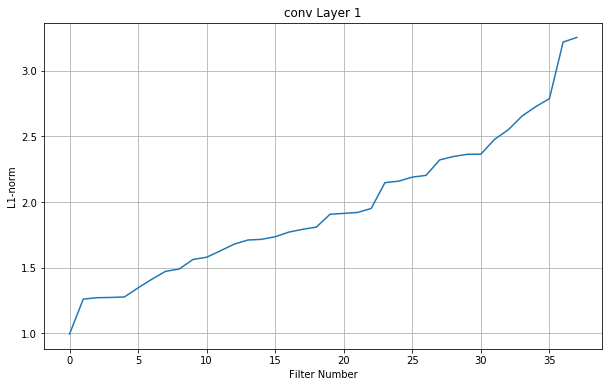

In [16]:
xc = range(num_filter)

plt.figure(i+1, figsize = (10,6))
plt.plot(xc, weights_value)
plt.xlabel('Filter Number')
plt.ylabel('L1-norm')
plt.title('conv Layer {}'.format(i+1))
plt.grid(True)

plt.show()

In [5]:
from kerassurgeon import identify
from kerassurgeon.operations import delete_channels, delete_layer

Delete filters with low L1-norm


In [18]:
layer_1 = model_3.layers[0] 
#Delete filters where l1-norm < 1.5
#Total of 9 filters have L1-norm <1 are : [0,8,18,11,35,22,29,32,36] 
new_model_3 = delete_channels(model_3, layer_1, [0,8,18,11,35,22,29,32,36])
new_model_3.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

Deleting 9/38 channels from layer: conv2d_1


In [24]:
new_scores_3 = new_model_3.evaluate(x_test, y_test, verbose = 0)
print("Loss: {} \n Accuracy: {} \n Error: {}".format(new_scores_3[0], new_scores_3[1], 100-new_scores_3[1] * 100))

Loss: 0.3076727448582649 
 Accuracy: 0.8975 
 Error: 10.25


In [20]:
new_model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 29)        754       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1534200   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,535,964
Trainable params: 1,535,964
Non-trainable params: 0
_________________________________________________

### Prediction

Since the model that has 3 hidden layers (initial model) performace the best, we will use that model for prediction. 

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 32)        4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)            

In [81]:
prediction = model.predict(x_test)

In [83]:
prediction[0]

array([7.1287167e-09, 7.3489870e-10, 1.3895434e-06, 8.8917269e-11,
       1.2392177e-09, 4.9166410e-05, 4.2609649e-10, 1.2511789e-04,
       1.0459520e-07, 9.9982423e-01], dtype=float32)

In [86]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

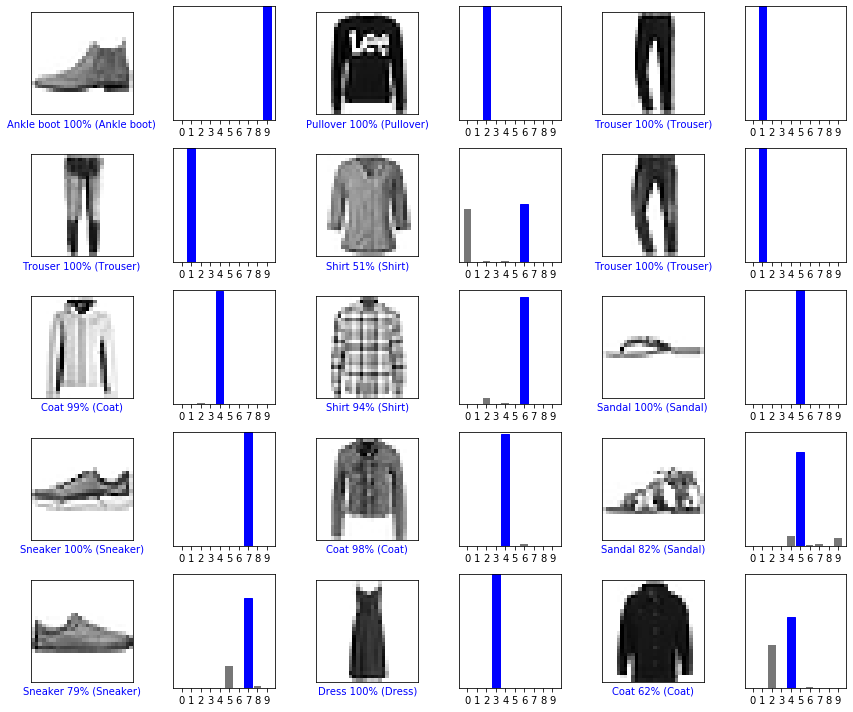

In [106]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction[i], y_test)
plt.tight_layout()
plt.show()

In [103]:
y_test[1]

2